In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [6]:
!cp /content/drive/My\ Drive/L7andL8/thecarconnectionpicturedataset.rar /content/

In [7]:
!pip install patool

     |████████████████████████████████| 81kB 2.3MB/s 


In [8]:
!mkdir /content/CarImages/

In [9]:
import patoolib
patoolib.extract_archive('/content/thecarconnectionpicturedataset.rar', outdir='/content/CarImages/')

patool: Extracting /content/thecarconnectionpicturedataset.rar ...
patool: running /usr/bin/unrar x -- /content/thecarconnectionpicturedataset.rar
patool:     with cwd='/content/CarImages/'
patool: ... /content/thecarconnectionpicturedataset.rar extracted to `/content/CarImages/'.


'/content/CarImages/'

# Create an array of unstructured data and analyze it WITHOUT explicitly creating a table first.  

In [10]:
import os
arr = os.listdir('/content/CarImages/')
print(arr[:10])

['Ford_Fiesta_2016_14_15_120_16_4_67_58_173_28_FWD_5_4_4dr_ZBk.jpg', 'Mercedes-Benz_Metris_2020_31_17_200_20_4_75_75_202_20_RWD_2_3_Van_Yfb.jpg', 'Alfa Romeo_Giulia_2017_39_17_280_20_4_73_56_182_23_AWD_5_4_4dr_Sed.jpg', 'Chevrolet_Volt_2016_33_17_140_15_4_71_56_180_43_FWD_5_4_4dr_EuI.jpg', 'Nissan_Sentra_2017_24_18_180_16_4_69_58_183_25_FWD_5_4_4dr_IaF.jpg', 'Kia_Sportage_2017_27_18_180_24_4_73_65_176_21_AWD_5_4_SUV_tBW.jpg', 'MINI_Clubman_2019_26_16_130_15_3_70_56_168_22_AWD_5_4_4dr_oMG.jpg', 'Honda_Accord_2013_25_17_180_24_4_72_56_189_26_FWD_5_2_2dr_rPZ.jpg', 'Subaru_Impreza_2011_18_16_170_25_4_68_58_180_20_AWD_5_4_4dr_Nxx.jpg', 'Mitsubishi_Eclipse Cross_2019_23_16_150_15_4_71_66_173_26_FWD_5_4_SUV_IMu.jpg']


In [11]:
# 'Make', 'Model', 'Year', 'MSRP', 'Front Wheel Size (in)', 'SAE Net Horsepower @ RPM', 'Displacement', 'Engine Type', 'Width, Max w/o mirrors (in)', 'Height, Overall (in)', 'Length, Overall (in)', 'Gas Mileage', 'Drivetrain', 'Passenger Capacity', 'Passenger Doors', 'Body Style'

In [25]:
# Exploring the filename strings after parsing out just the first word of the filename - which represents the brand of the vehicle. 

import pandas as pd
df = pd.DataFrame({'filename': arr})
# df['filename'].str.split('_').str[0].str.split('_').str[-1]  

# How many images of each car type do we have?         
df['filename'].str.split('_').str[2].value_counts()

2019    10224
2011     9090
2017     7965
2016     6453
2015     6284
2014     5606
2020     5562
2012     5112
2013     4691
2010     1938
2009      351
2005      273
2008      224
2006      175
2004      152
2007      123
2003       64
2001       39
1999       36
2000       34
2002       28
1998       25
1997       10
1990        3
1995        2
1996        2
1994        1
Name: filename, dtype: int64

In [26]:
DataFrameOfCarData = pd.DataFrame(df['filename'].str.split('_').tolist(), index= df.index)
DataFrameOfCarData.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,Ford,Fiesta,2016,14,15,120,16,4,67,58,173,28,FWD,5,4,4dr,ZBk.jpg
1,Mercedes-Benz,Metris,2020,31,17,200,20,4,75,75,202,20,RWD,2,3,Van,Yfb.jpg
2,Alfa Romeo,Giulia,2017,39,17,280,20,4,73,56,182,23,AWD,5,4,4dr,Sed.jpg
3,Chevrolet,Volt,2016,33,17,140,15,4,71,56,180,43,FWD,5,4,4dr,EuI.jpg
4,Nissan,Sentra,2017,24,18,180,16,4,69,58,183,25,FWD,5,4,4dr,IaF.jpg


In [47]:
DataFrameOfCarData.columns = ['Make', 'Model', 'Year', 'MSRP', 'Front Wheel Size (in)', 'SAE Net Horsepower @ RPM', 'Displacement', 'Engine Type', 'Width, Max w/o mirrors (in)', 'Height, Overall (in)', 'Length, Overall (in)', 'Gas Mileage', 'Drivetrain', 'Passenger Capacity', 'Passenger Doors', 'Body Style','ID']
DataFrameOfCarData['ID'] = DataFrameOfCarData['ID'].str.split('.').str[0] 
DataFrameOfCarData.head()

,Make,Model,Year,MSRP,Front Wheel Size (in),SAE Net Horsepower @ RPM,Displacement,Engine Type,"Width, Max w/o mirrors (in)","Height, Overall (in)","Length, Overall (in)",Gas Mileage,Drivetrain,Passenger Capacity,Passenger Doors,Body Style,ID
0,Ford,Fiesta,2016,14.0,15,120,16,4,67,58,173,28,FWD,5,4,4dr,ZBk
1,Mercedes-Benz,Metris,2020,31.0,17,200,20,4,75,75,202,20,RWD,2,3,Van,Yfb
2,Alfa Romeo,Giulia,2017,39.0,17,280,20,4,73,56,182,23,AWD,5,4,4dr,Sed
3,Chevrolet,Volt,2016,33.0,17,140,15,4,71,56,180,43,FWD,5,4,4dr,EuI
4,Nissan,Sentra,2017,24.0,18,180,16,4,69,58,183,25,FWD,5,4,4dr,IaF


In [60]:
# DataFrameOfCarData['MSRP'] = DataFrameOfCarData['MSRP'].astype(float)

convert_dict = { 'Year':int, 'MSRP':float, 'Front Wheel Size (in)':float, 'SAE Net Horsepower @ RPM':float, 'Displacement':float, 
                'Engine Type':float, 'Width, Max w/o mirrors (in)':float, 
                'Height, Overall (in)':float, 'Length, Overall (in)':float, 'Gas Mileage':float, 
                 'Passenger Capacity':int, 'Passenger Doors':int }

DataFrameOfCarData = DataFrameOfCarData.astype(convert_dict, errors='ignore')                 

In [59]:
DataFrameOfCarData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64467 entries, 0 to 64466
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Make                         64467 non-null  object 
 1   Model                        64467 non-null  object 
 2   Year                         64467 non-null  int64  
 3   MSRP                         63673 non-null  float64
 4   Front Wheel Size (in)        63732 non-null  float64
 5   SAE Net Horsepower @ RPM     64467 non-null  object 
 6   Displacement                 62257 non-null  float64
 7   Engine Type                  62145 non-null  float64
 8   Width, Max w/o mirrors (in)  64467 non-null  object 
 9   Height, Overall (in)         64467 non-null  object 
 10  Length, Overall (in)         64467 non-null  object 
 11  Gas Mileage                  57494 non-null  float64
 12  Drivetrain                   64467 non-null  object 
 13  Passenger Capaci

In [66]:
# DataFrameOfCarData['SAE Net Horsepower @ RPM'].value_counts()
# DataFrameOfCarData['SAE Net Horsepower @ RPM'] = float(DataFrameOfCarData['SAE Net Horsepower @ RPM'])

In [67]:
DataFrameOfCarData.to_csv("DataFrameOfCarData_toProcessinR.csv")  # Export data for cleansing in R

In [68]:
!cp  /content/DataFrameOfCarData_toProcessinR.csv  /content/drive/My\ Drive/L7andL8/

In [31]:
!pip install seaborn

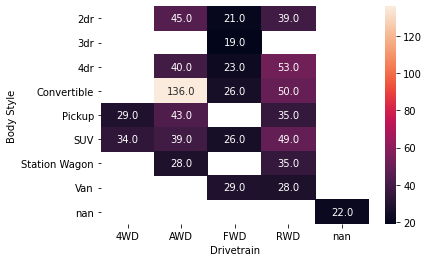

In [40]:
import seaborn as sns
import numpy as np

df = DataFrameOfCarData.pivot_table(index='Body Style', columns='Drivetrain', values='MSRP', aggfunc=np.median)
sns.heatmap(df, annot=True, fmt=".1f")

# Analyze the cleaned data exported from R

In [70]:
DataFrameOfCarData = pd.read_csv("/content/DataFrameOfCarData_toProcessedinR.csv")

In [84]:
DataFrameOfCarData.head()

,Unnamed: 0,Make,Model,Year,MSRP,Front Wheel Size (in),SAE Net Horsepower @ RPM,Displacement,Engine Type,"Width, Max w/o mirrors (in)","Height, Overall (in)","Length, Overall (in)",Gas Mileage,Drivetrain,Passenger Capacity,Passenger Doors,Body Style,ID
0,1,Ford,Fiesta,2016,14.0,15.0,120.0,16.0,4.0,67.0,58.0,173.0,28.0,FWD,5.0,4.0,4dr,ZBk
1,2,Mercedes-Benz,Metris,2020,31.0,17.0,200.0,20.0,4.0,75.0,75.0,202.0,20.0,RWD,2.0,3.0,Van,Yfb
2,3,Alfa Romeo,Giulia,2017,39.0,17.0,280.0,20.0,4.0,73.0,56.0,182.0,23.0,AWD,5.0,4.0,4dr,Sed
3,4,Chevrolet,Volt,2016,33.0,17.0,140.0,15.0,4.0,71.0,56.0,180.0,43.0,FWD,5.0,4.0,4dr,EuI
4,5,Nissan,Sentra,2017,24.0,18.0,180.0,16.0,4.0,69.0,58.0,183.0,25.0,FWD,5.0,4.0,4dr,IaF


In [80]:
from scipy.stats import ttest_ind as tind

# Separating two samples into different data frames
df1 = DataFrameOfCarData[DataFrameOfCarData.Drivetrain == 'AWD']
df2 = DataFrameOfCarData[DataFrameOfCarData.Drivetrain == 'FWD']

tind(df1.MSRP.dropna(), df2.MSRP.dropna(),  equal_var=False)      

Ttest_indResult(statistic=95.38622229522244, pvalue=0.0)

# Classify the data using Libra

In [82]:
!pip install libra

     |████████████████████████████████| 71kB 2.0MB/s 
     |████████████████████████████████| 61kB 5.3MB/s 
     |████████████████████████████████| 51kB 5.2MB/s 
     |████████████████████████████████| 1.8MB 24.4MB/s 
     |████████████████████████████████| 675kB 46.2MB/s 
     |████████████████████████████████| 890kB 46.4MB/s 
     |████████████████████████████████| 3.8MB 44.7MB/s 
     |████████████████████████████████| 1.1MB 50.7MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.1-cp36-none-any.whl size=73200 sha256=fb14a3b161784384866a1ac2ddbbacdc97f9fed30a4e21be04199a0353e9c01a
  Stored in directory: /root/.cache/pip/wheels/b9/cc/62/52716b70dd90f3db12519233c3a93a5360bc672da1a10ded43
  Created wheel for python-Levenshtein: filename=python_Levenshtein-0.12.0-cp36-cp36m-linux_x86_64.whl size=144791 sha256=43b982245ddc7ae9b9bef414a9b9b26578bddba54c976491374442ff8db2521e
  Stored in directory: /root/.cache/pip/wheels/de/c2/93/660fd5f7559049268ad2dc6d81c4e39e9e36518766eaf7e

In [86]:
DataFrameOfCarData.head(1000).to_csv("testDataForLibra.csv")

In [87]:
from libra import client
a_client = client('testDataForLibra.csv')

Creating client object
  |- Reading in dataset




Reading in dataset
->Target column found: Drivetrain
  |- Establishing callback function
    |- Training initial model
      | Initial number of layers   | Training Accuracy        | Test Accuracy             |
      | 3                          | 0.7848101258277893       | 0.7861635088920593        |
      |- Testing number of layers
        | Current number of layers  | Training Accuracy       | Test Accuracy            |
        | 3                         | 0.7832278609275818      | 0.7798742055892944       |
        | 4                         | 0.8148733973503113      | 0.8176100850105286       |
        | 5                         | 0.8702531456947327      | 0.8364779949188232       |
        | 6                         | 0.8765822649002075      | 0.8176100850105286       |

      ->Best number of layers found: 5
      ->Training Accuracy: 0.8702531456947327
      ->Test Accuracy: 0.8364779949188232
->Saved model to disk as model1

        |- Stored model under 'classification_A

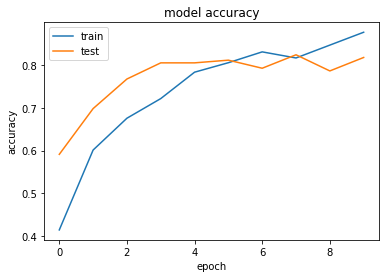

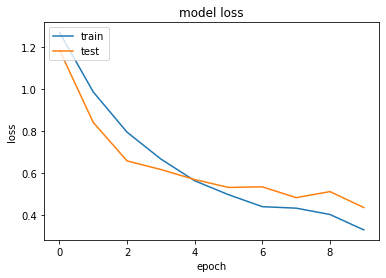

In [96]:
a_client.neural_network_query('Identify Drivetrain', epochs=10, drop=['ID', 'Unnamed: 0'], save_model=True)


Analyzing classification_ANN for further understanding
  |- Making predictions for test data
    |- Transforming dataset for plotting module
    ->Plotting ROC curves and creating confusion matrix...
      |- Investigating potential issues with calculations
        |- Gathering metrics for display: 
        ->Accuracy on test set: 0.8364779949188232
        ->Recall on test set: 0.8364779874213837
        ->Precision on test set: 0.8364779874213837
        ->F1 Score on test set: 0.8364779874213837



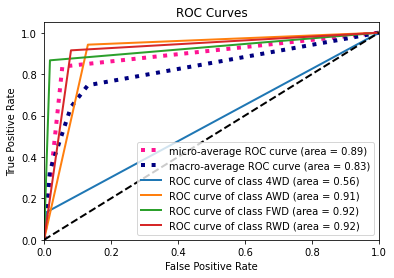

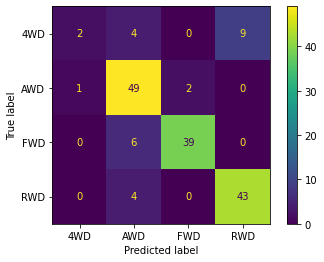

In [97]:
# a_client.models['classification_ANN'].plots() #access plots
a_client.analyze()

In [98]:
DataFrameOfCarData.tail(1000).to_csv("OOStestDataForLibra.csv")

In [99]:
new_data = pd.read_csv('OOStestDataForLibra.csv')
predictionsOnOOSdata = a_client.predict(new_data.drop(['Drivetrain'], axis=1), model='classification_ANN')

In [100]:
new_data['Predictions'] = predictionsOnOOSdata

In [101]:
new_data.to_csv("new_dataPredictions.csv")